# Explore here

In [ ]:
# Your code here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import pickle


## 1-Carga de DataSet

In [ ]:
#Mostramos los números con 2 decimales
pd.set_option('display.float_format', '{:.2f}'.format)

#1-Cargamos el dataset y convertimos a df
ds = pd.read_csv('/workspaces/Elreno23-machine-learning-python-template/data/raw/internal-link.csv')
df = pd.DataFrame(ds)

df



,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.65,-73.97,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75,-73.98,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.81,-73.94,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.69,-73.96,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.80,-73.94,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.68,-73.95,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70,-73.93,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81,-73.95,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.76,-73.99,Shared room,55,1,0,NaN,NaN,6,2


## 2-Exploración Inicial

In [ ]:
df.info() #Info basica
stadisctics = df.describe().T #Estadisticas de columnas numericas
null = df.isna().sum() #Sumamos los NULOS de cada columna
null, stadisctics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

(id                                    0
 name                                 16
 host_id                               0
 host_name                            21
 neighbourhood_group                   0
 neighbourhood                         0
 latitude                              0
 longitude                             0
 room_type                             0
 price                                 0
 minimum_nights                        0
 number_of_reviews                     0
 last_review                       10052
 reviews_per_month                 10052
 calculated_host_listings_count        0
 availability_365                      0
 dtype: int64,
                                   count        mean         std     min  \
 id                             48895.00 19017143.24 10983108.39 2539.00   
 host_id                        48895.00 67620010.65 78610967.03 2438.00   
 latitude                       48895.00       40.73        0.05   40.50   
 longitude               

# Conclusiones

El dataset contiene 16 columnas con tipos de datos variados. Se detectaron columnas con muchos valores nulos (last_review, reviews_per_month) y otras con pocos (name, host_name). Variables como id y host_id, etc, no aportan valor predictivo. Se observaron outliers en price y minimum_nights, y alta dispersión en reviews_per_month. Este analisis indics la necesidad de limpieza, imputación y posible transformación de variables.



# 3-Limpieza de Datos

In [ ]:
#No eliminamos duplicados por que no hay

#Imputamos la columna "reviews_per_month" con 0.0
reviews_per_month = df["reviews_per_month"].fillna(0.0, inplace=True)
#print(reviews_per_month)
#Verificamos que no exista una fila con "host_id" y "host_name" nulos
#print(f"Nulos en host_id y host_name: {len(df[df['host_id'].isna() | df['host_name'].isna()])}")


df= df[df["price"].notna()]
df


#17 mil viviendas no se alquilaron en el año(35%), valen para nuestro objetivo?
#print(f"No disponibles al año: {(df['availability_365'] == 0).sum() / df.shape[0] * 100}")
#Decidí eliminarlas para obtener el valor real de las viviendas activas
df = df[df["availability_365"] > 0]
df["availability_365"].shape[0]


df = df.drop(["last_review","latitude","longitude","name","host_name","host_id"],axis=1)



#Distribucion de frecuencias:
df["room_type"].value_counts() #Categorias con pocos registros? -> Shared room(861)
df["room_type"].isna().sum() #Nulos? -> 0

df["neighbourhood"].value_counts()
df["neighbourhood"].isna().sum()

df["neighbourhood_group"].value_counts()
df["neighbourhood_group"].isna().sum()

#Vale la pena tomar en cuenta ese 4.45%?
price_distribution = (df[df["price"] > 400].shape[0] / df.shape[0]) * 100
price_distribution

/tmp/ipykernel_797/1346257093.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  reviews_per_month = df["reviews_per_month"].fillna(0.0, inplace=True)


4.451246731713539

# Conclusiones

Se imputó la columna reviews_per_month con 0.0 debido a la alta cantidad de valores nulos. Se eliminaron registros con availability_365 = 0 para centrarse en viviendas activas. También se eliminaron columnas irrelevantes o con información no estructurada (last_review, latitude, longitude, name, host_name, host_id). Se verificó la ausencia de duplicados y se revisaron las categorías de variables como room_type, neighbourhood y neighbourhood_group, confirmando que no presentan nulos. El dataset quedó filtrado y depurado para análisis posterior. Cabe recalca que esta limpieza es inicial no podemos apresurarnos a eliminar, transformar o imputar todas las variables sin hacer un analisis mas exhaustivo posteriormente


# 4-Analisis Univariable

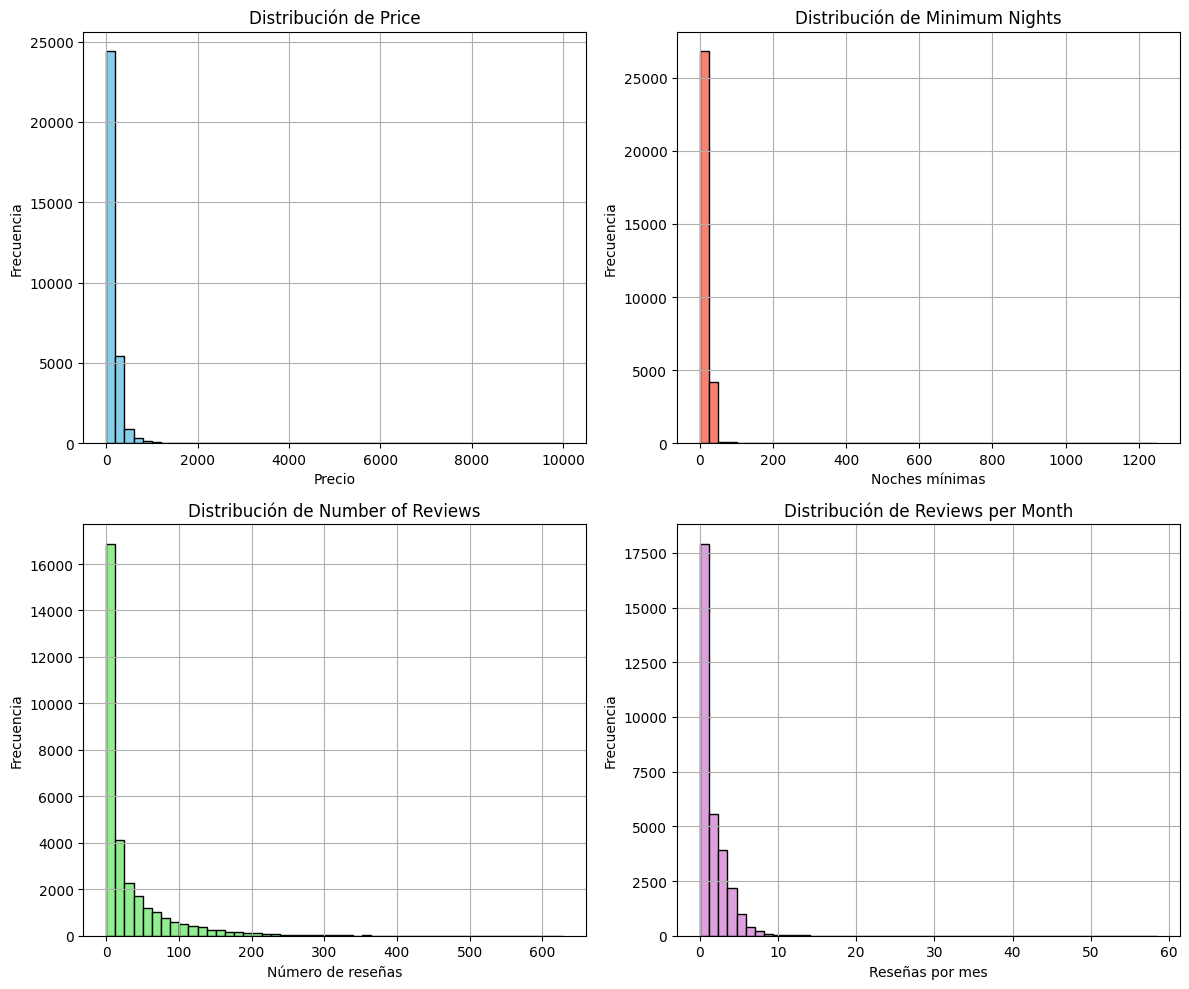

In [ ]:
plt.figure(figsize=(12, 10))
#Usamos plt.subplot() en lugar de fig, axs por simplicidad.Pero ambos métodos hacen lo mismo
# Histograma de price
plt.subplot(2, 2, 1)
df["price"].hist(bins=50, color='skyblue', edgecolor='black')
plt.title("Distribución de Price")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")

# Histograma de minimum_nights
plt.subplot(2, 2, 2)
df["minimum_nights"].hist(bins=50, color='salmon', edgecolor='black')
plt.title("Distribución de Minimum Nights")
plt.xlabel("Noches mínimas")
plt.ylabel("Frecuencia")

# Histograma de number_of_reviews
plt.subplot(2, 2, 3)
df["number_of_reviews"].hist(bins=50, color='lightgreen', edgecolor='black')
plt.title("Distribución de Number of Reviews")
plt.xlabel("Número de reseñas")
plt.ylabel("Frecuencia")

# Histograma de reviews_per_month
plt.subplot(2, 2, 4)
df["reviews_per_month"].hist(bins=50, color='plum', edgecolor='black')
plt.title("Distribución de Reviews per Month")
plt.xlabel("Reseñas por mes")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

# Conclusiones

Se analizaron las distribuciones de variables clave mediante histogramas. Los gráficos reflejan fielmente las decisiones de limpieza: la imputación de reviews_per_month con 0.0, el filtrado de viviendas no activas (availability_365 = 0) y la eliminación de registros con price nulo. Se confirmó la presencia de outliers en price y minimum_nights, y una alta concentración de valores bajos en reviews_per_month. Las distribuciones son coherentes con el dataset depurado.

# 5-Analisis Multivariante

#### A-Numerica vs Numerica

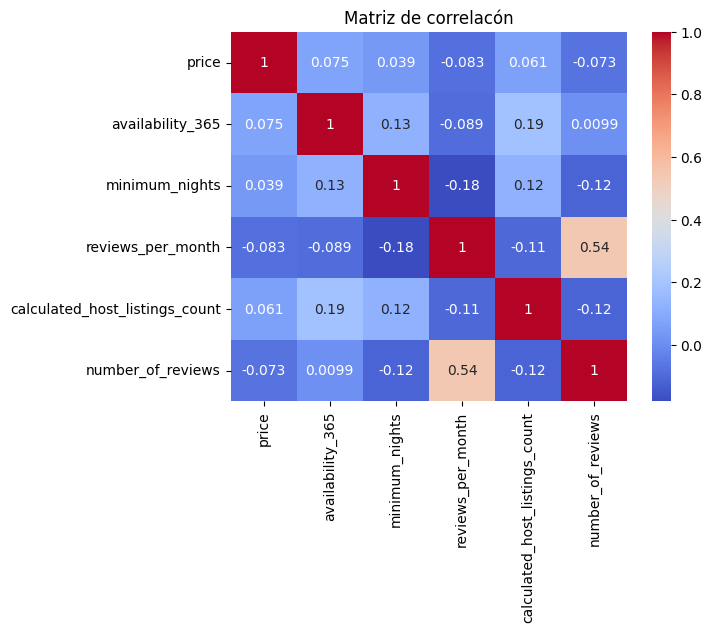

,id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,2595,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
2,3647,Manhattan,Harlem,Private room,150,3,0,0.00,1,365
3,3831,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
5,5099,Manhattan,Murray Hill,Entire home/apt,200,3,74,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,0.00,2,9
48891,36485057,Brooklyn,Bushwick,Private room,40,4,0,0.00,2,36
48892,36485431,Manhattan,Harlem,Entire home/apt,115,10,0,0.00,1,27
48893,36485609,Manhattan,Hell's Kitchen,Shared room,55,1,0,0.00,6,2


In [ ]:
#1-Correlacion entre variables
cols = ["price","availability_365","minimum_nights","reviews_per_month","calculated_host_listings_count","number_of_reviews"]

sns.heatmap(df[cols].corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de correlacón")
plt.show()

#Estas variables podrian estar afectando otras variables indirectamente que si influyen sobre el precio(Relacion Indirecta)
df


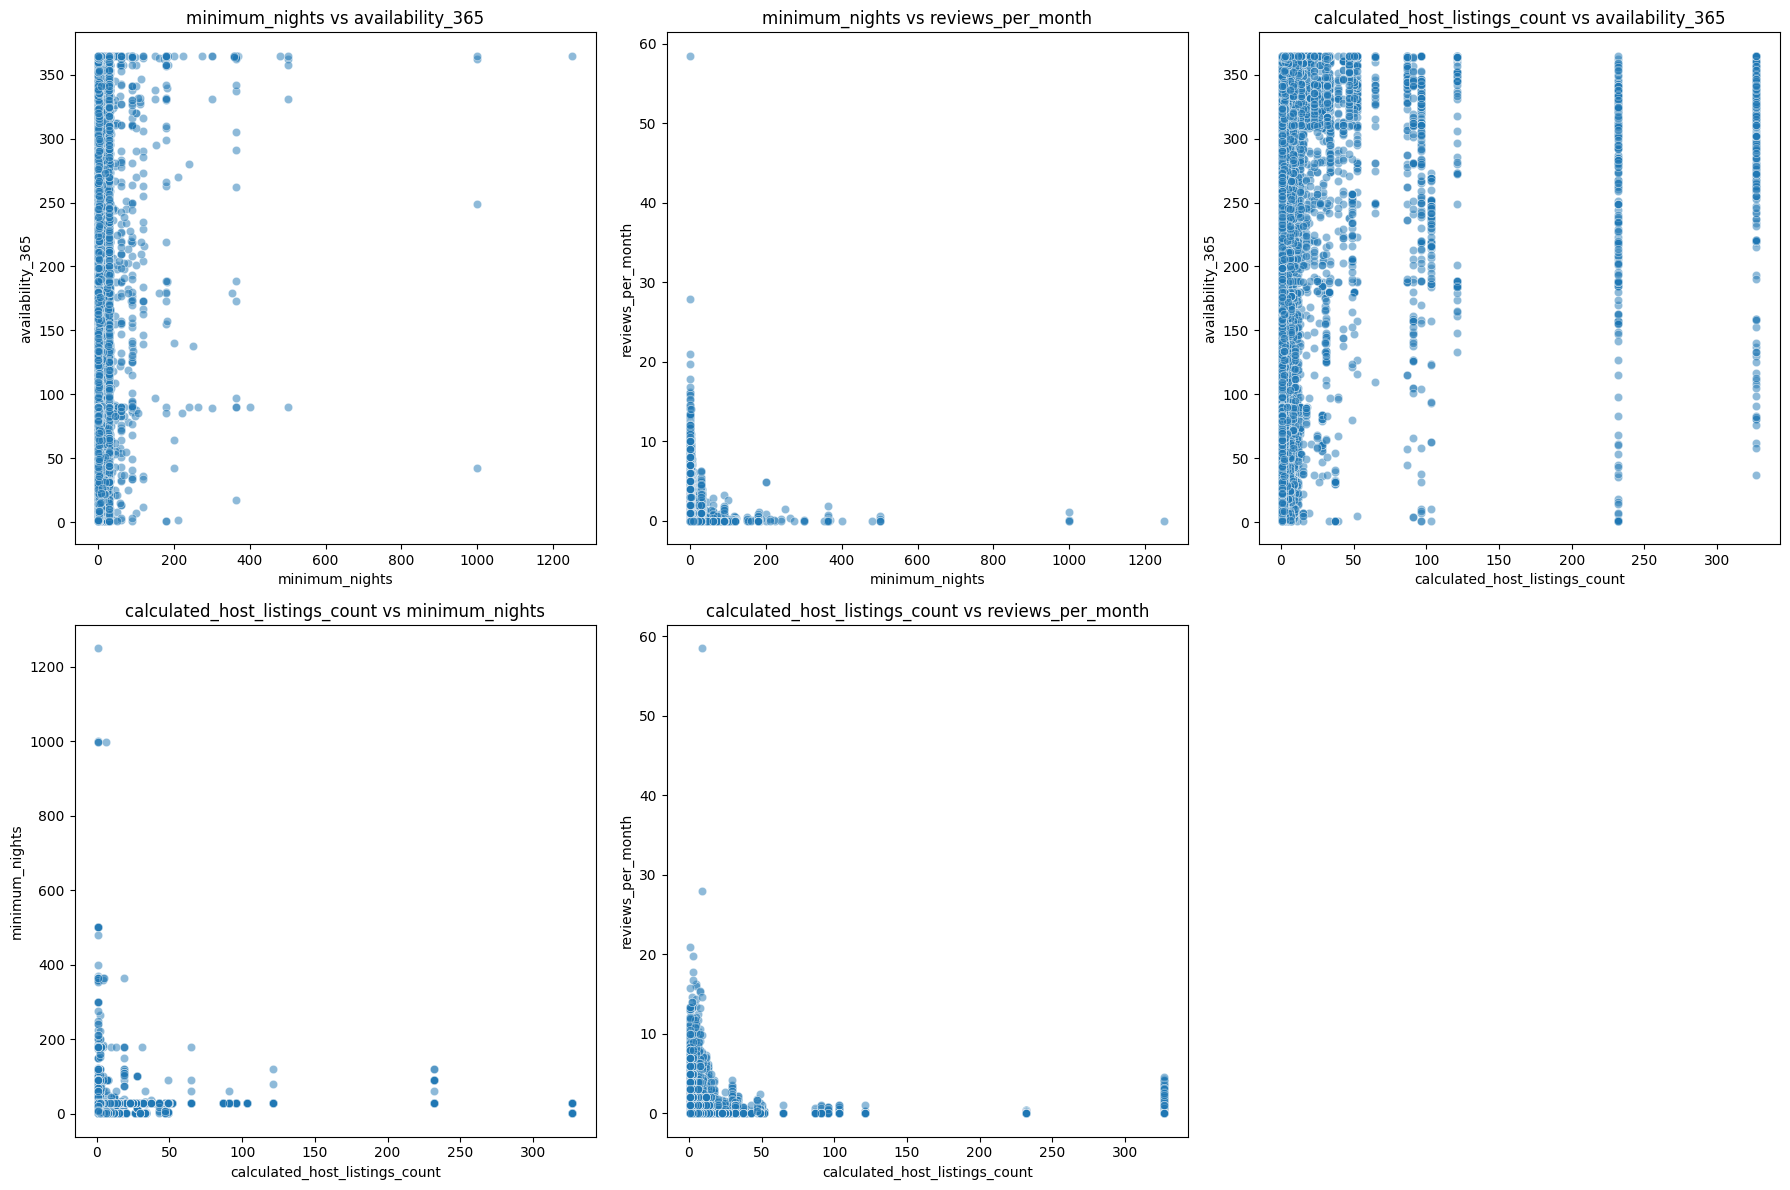

In [ ]:
#Relacion de variables relevantes
fig, axs = plt.subplots(2,3, figsize=(18,12))

sns.scatterplot(x="minimum_nights", y="availability_365", data=df, alpha=0.5, ax=axs[0][0])
axs[0][0].set_title("minimum_nights vs availability_365")

sns.scatterplot(x="minimum_nights", y="reviews_per_month", data=df, alpha=0.5, ax=axs[0][1])
axs[0][1].set_title("minimum_nights vs reviews_per_month")

sns.scatterplot(x="calculated_host_listings_count", y="availability_365", data=df, alpha=0.5, ax=axs[0][2])
axs[0][2].set_title("calculated_host_listings_count vs availability_365")

sns.scatterplot(x="calculated_host_listings_count", y="minimum_nights", data=df, alpha=0.5, ax=axs[1][0])
axs[1][0].set_title("calculated_host_listings_count vs minimum_nights")

sns.scatterplot(x="calculated_host_listings_count", y="reviews_per_month", data=df, alpha=0.5, ax=axs[1][1])
axs[1][1].set_title("calculated_host_listings_count vs reviews_per_month")


#Ocultamos el ultimo grafico
axs[1][2].axis("off")

#Ajusta automáticamente los espacios entre los subplots para que no se superpongan
plt.tight_layout()

plt.show()

### B-Categorico vs Categorico

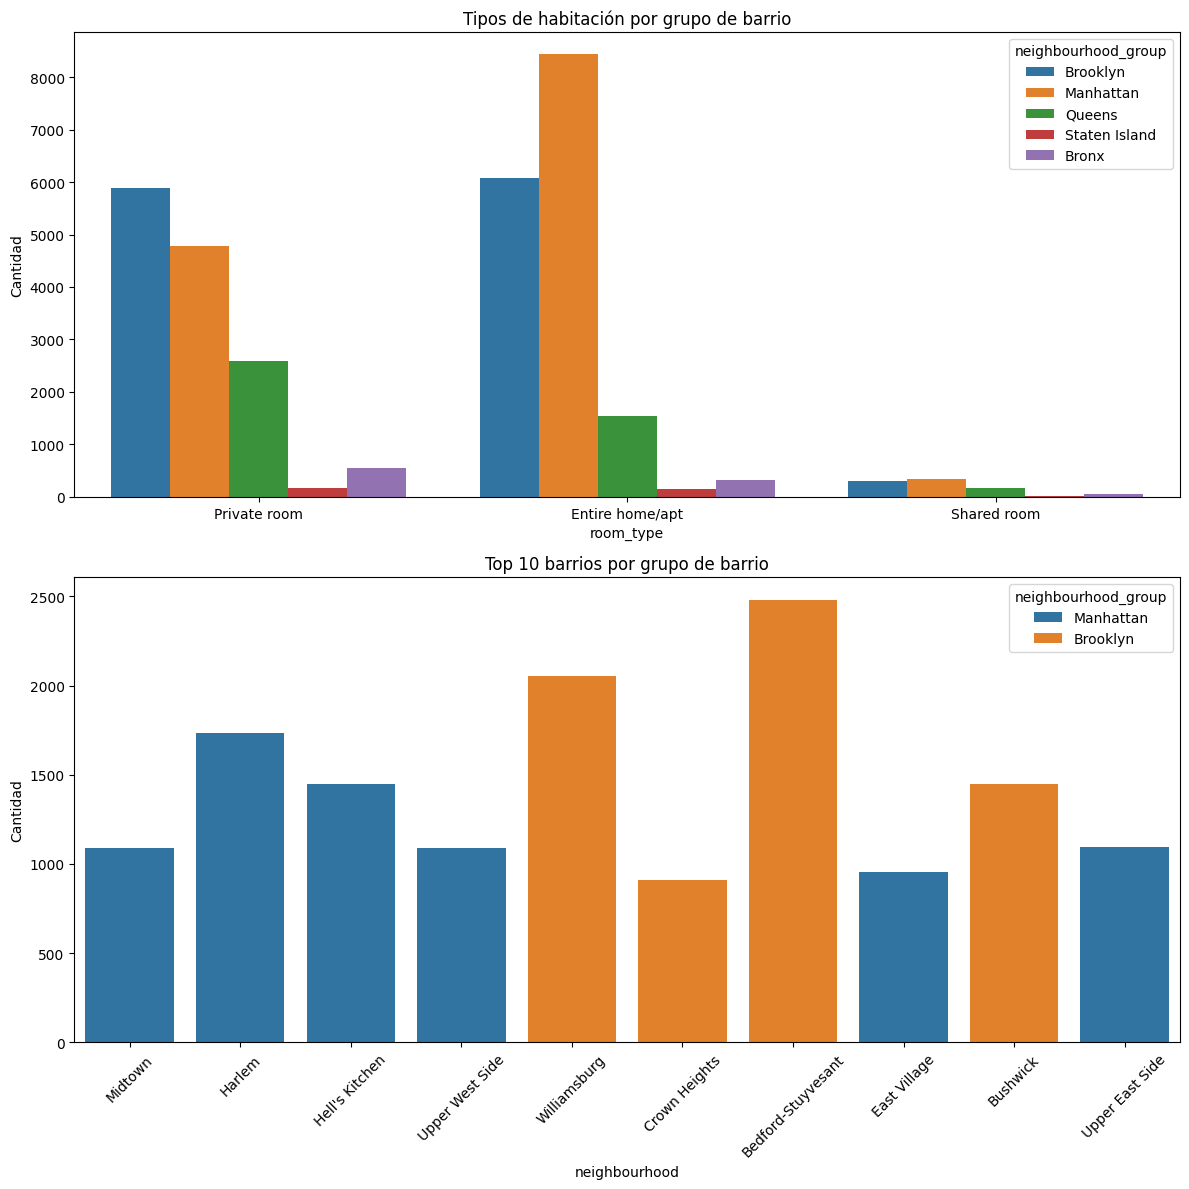

In [ ]:
fig, axs = plt.subplots(2,1, figsize=(12,12))
sns.countplot(ax=axs[0], data=df, x="room_type", hue="neighbourhood_group")
axs[0].set_title("Tipos de habitación por grupo de barrio")
axs[0].set_ylabel("Cantidad")


top_neigh = df["neighbourhood"].value_counts().head(10).index #Obtenemos los 10 barrios mas frecuentes
df_top = df[df["neighbourhood"].isin(top_neigh)] #filtramos solo por esos 10 barios mas frecuentes
sns.countplot(ax=axs[1],data=df_top, x="neighbourhood", hue="neighbourhood_group")
axs[1].set_title("Top 10 barrios por grupo de barrio")
axs[1].set_ylabel("Cantidad")
axs[1].tick_params(axis='x', rotation=45)  # Gira etiquetas si están muy apretadas


plt.tight_layout()
plt.show()


### C-Numerica vs Categorica

Text(0.5, 1.0, 'Precio por vecindario')

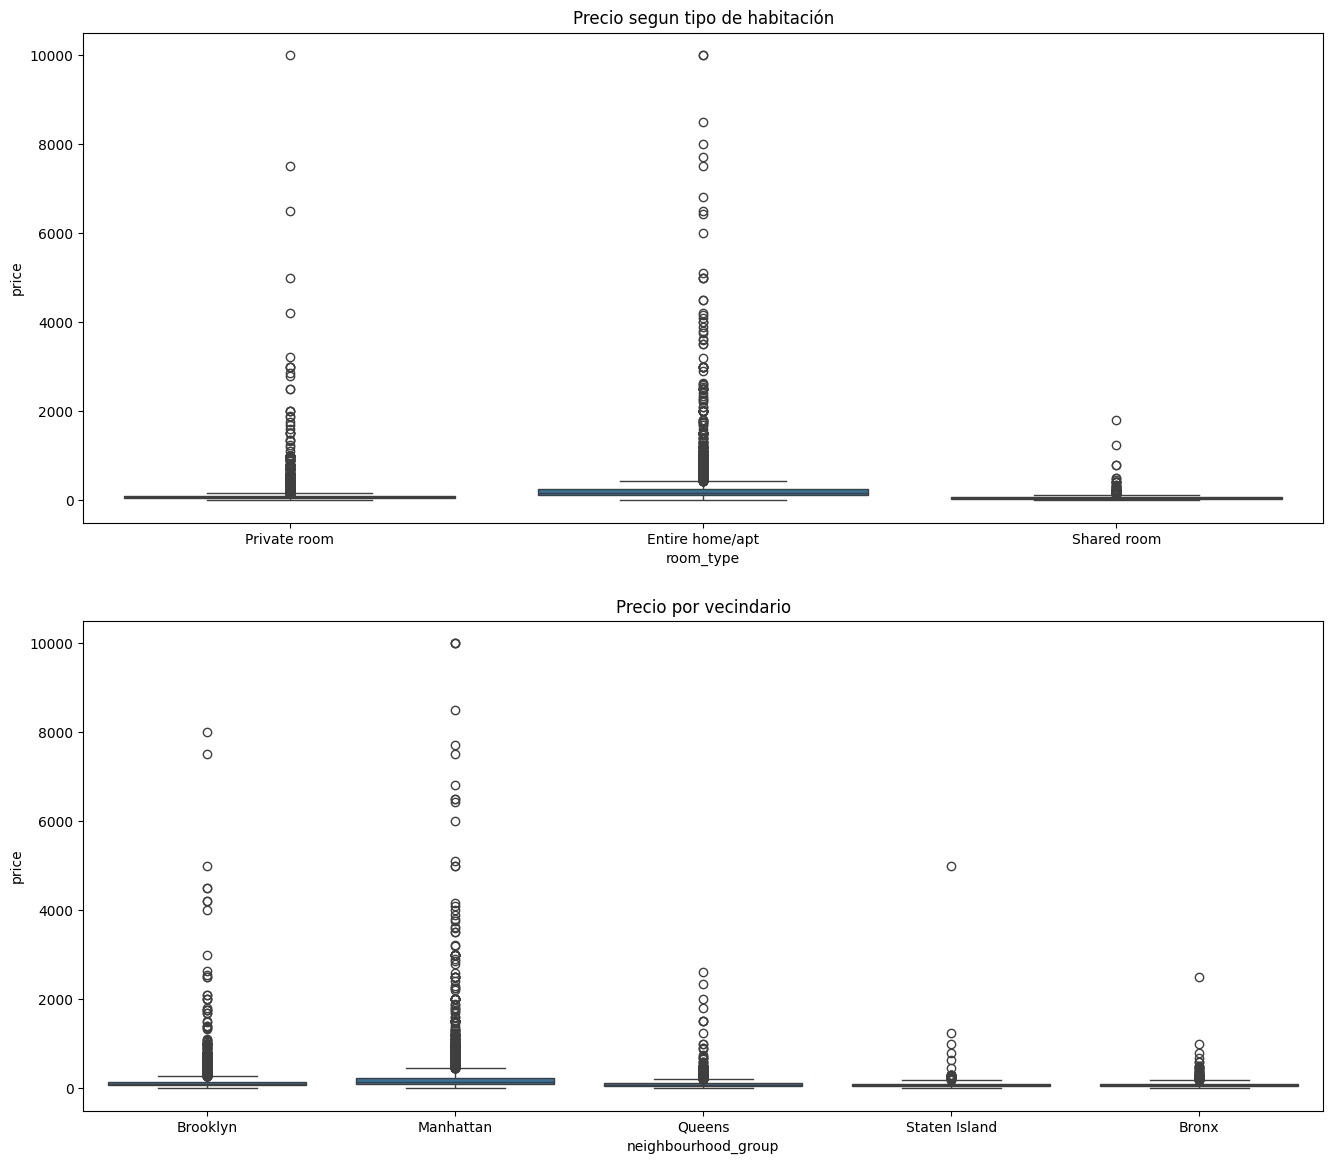

In [ ]:
#Relaciones:
df.groupby("room_type")["price"].mean() #Promedio
df.groupby("room_type")["price"].median() #Mediana

df.groupby("neighbourhood_group")["price"].mean()
df.groupby("neighbourhood_group")["price"].median()
#A pesar de hay variables numericas que pueden afectar indirectamente el precio no las agruparé para evitar dispersarme del objetivo.


#Cantidad de categorías
df["room_type"].nunique() 
df["neighbourhood_group"].nunique() 


#Graficos:
fig, axs = plt.subplots(2,1,figsize=(16,14))

sns.boxplot(ax=axs[0],x="room_type", y="price", data=df)
axs[0].set_title("Precio segun tipo de habitación")

sns.boxplot(ax=axs[1],x="neighbourhood_group", y="price", data=df)
axs[1].set_title("Precio por vecindario")

# Conclusiones

Se realizó un análisis multivariante para explorar las relaciones entre variables numéricas, categóricas y mixtas. Las correlaciones entre variables numéricas fueron en general débiles, aunque se detectaron asociaciones moderadas como la de reviews_per_month con number_of_reviews, y patrones indirectos entre minimum_nights, availability_365 y calculated_host_listings_count que podrían influir sobre el precio de forma no lineal. En el cruce entre variables categóricas, se observó que Manhattan y Brooklyn concentran la mayoría de alojamientos, especialmente del tipo “Entire home/apt”. Finalmente, los boxplots revelaron que tanto el tipo de habitación como el grupo de vecindario tienen un impacto claro en el precio, siendo Manhattan y las viviendas completas las que presentan las medianas más altas.

# 6-Detección de outliers (Limpieza)

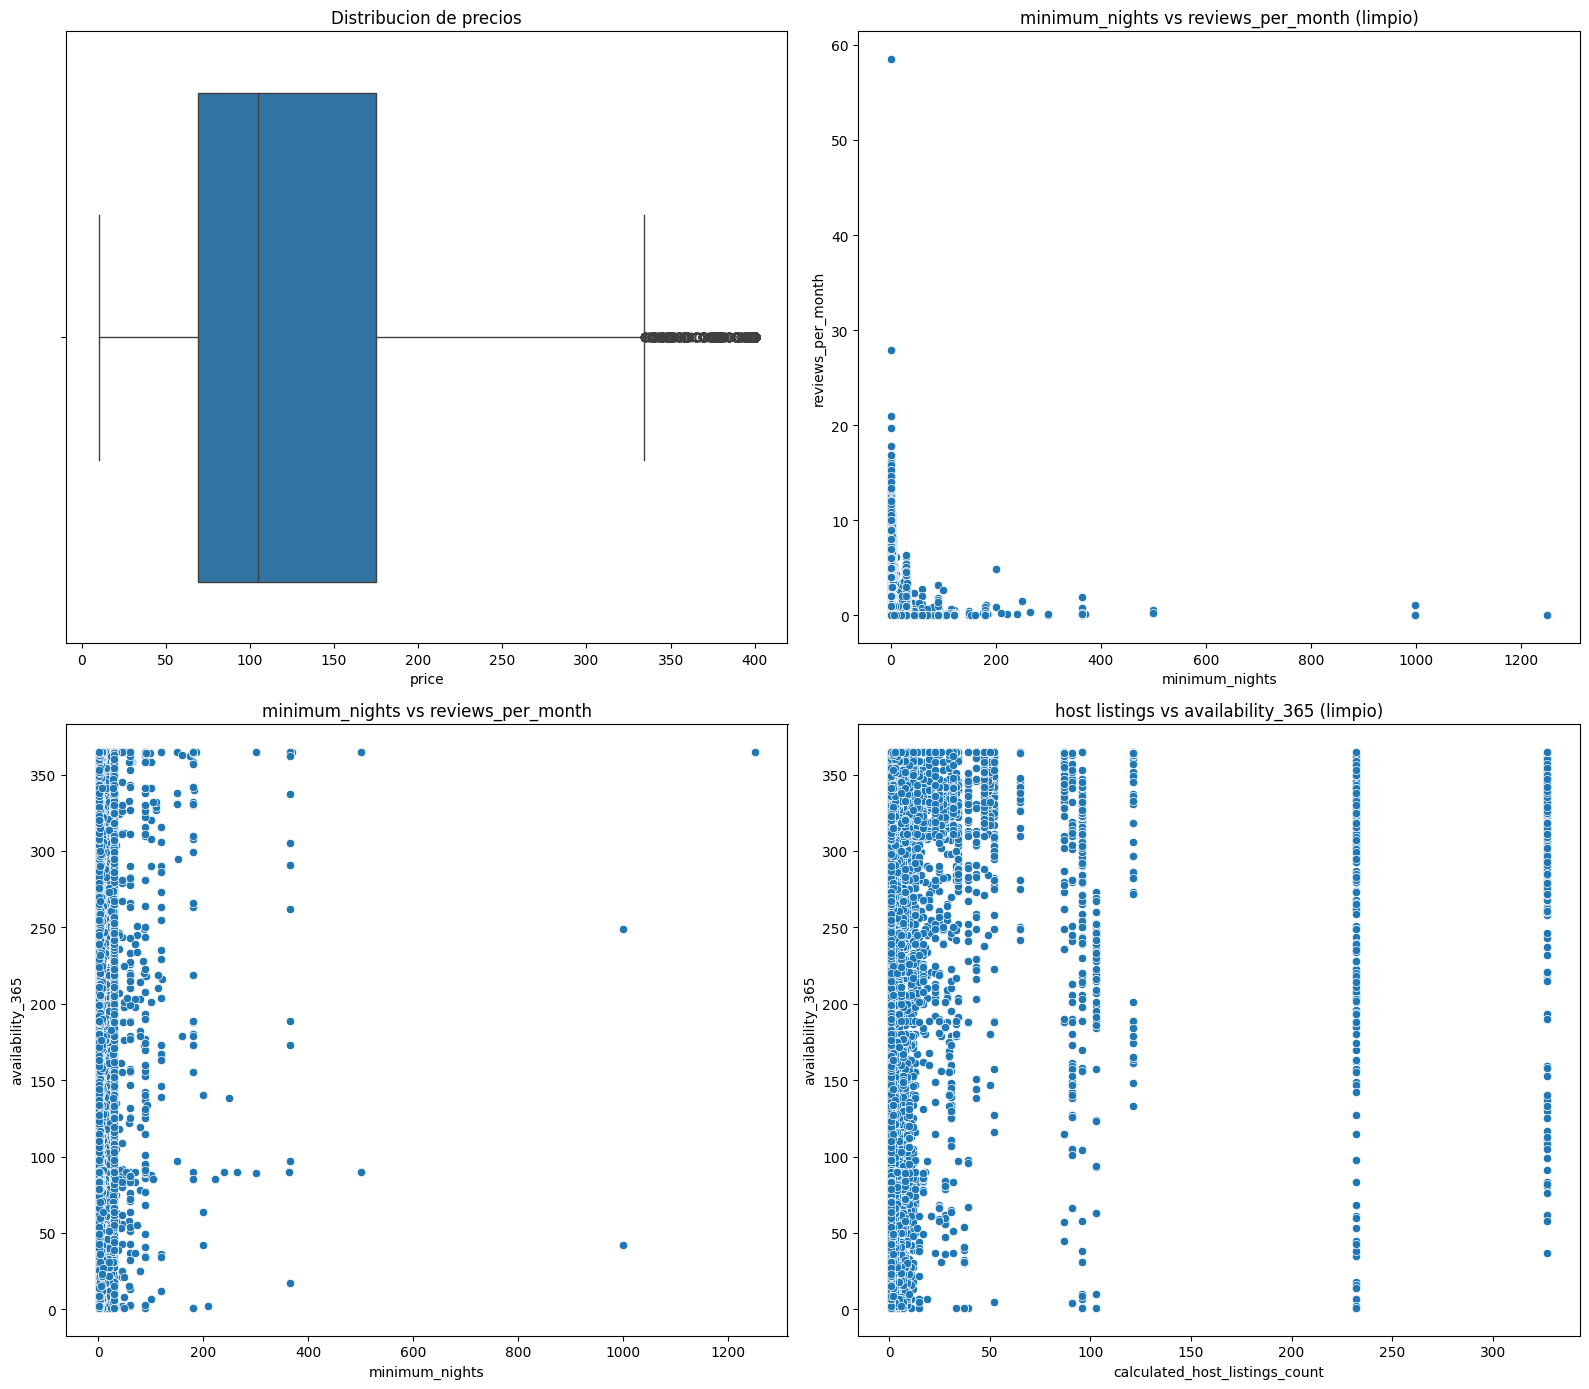

In [ ]:
df = df[(df["price"] > 0) & (df["price"] <= 400)]


#Cuantas propiedades exigen un año entero de estadia y estan disponibles menos de 30 dias al año, tiene sentido?
df[(df["minimum_nights"] > 365) & (df["availability_365"] < 30)]#-> no hay

#Que sentido tiene un alojamiento que exige 6 meses de estancia minima y no tiene reseñas?
df[(df["minimum_nights"] > 180) & (df["reviews_per_month"] == 0)]
df = df[~((df["minimum_nights"] > 180) & (df["reviews_per_month"] == 0))]

#Cuantos host tienen mas de 50 propiedades y estas cuantos dias estan disponibles al año?
df[(df["calculated_host_listings_count"] > 50) & (df["availability_365"] < 10)]
#Cuantas de estas propiedades estan disponibles 0 dias al año?
df[(df["calculated_host_listings_count"] > 50) & (df["availability_365"] == 0)]

fig, axs = plt.subplots(2,2,figsize=(16,14))

sns.boxplot(ax=axs[0][0],x=df["price"])
axs[0][0].set_title("Distribucion de precios")

sns.scatterplot(ax=axs[0][1],x="minimum_nights", y="reviews_per_month", data=df)
axs[0][1].set_title("minimum_nights vs reviews_per_month (limpio)")

sns.scatterplot(ax=axs[1][0],x="minimum_nights", y="availability_365", data=df)
axs[1][0].set_title("minimum_nights vs reviews_per_month")

sns.scatterplot(ax=axs[1][1],x="calculated_host_listings_count", y="availability_365", data=df)
axs[1][1].set_title("host listings vs availability_365 (limpio)")

plt.tight_layout()
plt.show()



# Conclusiones

Se filtraron precios extremos manteniendo solo alojamientos con valores entre 0 y 400, lo que permitió enfocar el análisis en propiedades reales y accesibles. Se eliminaron registros ilógicos, como alojamientos que exigen más de seis meses de estancia sin recibir reseñas, y se identificaron hosts con más de 50 propiedades que apenas están disponibles, lo que sugiere actividad no orientada al alquiler real. Los gráficos confirmaron la presencia de outliers en price, y mostraron concentraciones de datos en rangos bajos de minimum_nights, reviews_per_month y availability_365, reforzando la necesidad de estos filtros. Esta depuración final mejora la calidad del dataset y prepara una base sólida para el modelado.

### 6.1 Creacion de variables

In [ ]:
#Categorizamos
df["type_of_stay"] = df["minimum_nights"].apply(lambda x: "corta" if x <= 7 else "alquiler_temporal" if x <= 90 else "vivienda")
#print(f"Cantidad y tipo de estadía por minimum_nights: {df['type_of_stay'].value_counts()}")
#Posee 3 categorias:
#-Entire home/apt: alquila toda la propiedad
#-Private room: alquila habitacion privada
#-Shared room: habitación compartida


#Cuantos dias al año está disponible en relacion con su minimum_nights?
df["offer_intensity"] = df["availability_365"] / df["minimum_nights"]


#Definmos una columna "price_range" que tendrá un rango de precio de cada vivienda
df["price_range"] = pd.cut(x=df["price"], bins=[0,100,200,400],
labels=["<100","100-200","200-400"],
include_lowest=True,
right=False)


'''Decidimos unir las columnas vecindario(Estado y ciudad?) para tener una ubicacion mas precisa, evitamos ambiguedad.
La variable precise_location se creó durante la limpieza de datos para resolver ambigüedad entre las columnas `neighbourhood_group` y `neighbourhood`. 
Aunque puede aportar valor en el análisis multivariado, su creación responde a una necesidad de estructuración y claridad en el dataset, por lo que se mantiene en esta etapa'''

df["precise_location"] = df["neighbourhood_group"]+ "-" +df["neighbourhood"] 
df = df.drop(["neighbourhood","neighbourhood_group"], axis=1)
df["precise_location"]




0                Brooklyn-Kensington
1                  Manhattan-Midtown
2                   Manhattan-Harlem
3              Brooklyn-Clinton Hill
5              Manhattan-Murray Hill
                    ...             
48890    Brooklyn-Bedford-Stuyvesant
48891              Brooklyn-Bushwick
48892               Manhattan-Harlem
48893       Manhattan-Hell's Kitchen
48894       Manhattan-Hell's Kitchen
Name: precise_location, Length: 29928, dtype: object

# Conclusiones

Se generaron nuevas variables para mejorar la estructura y el valor analítico del dataset. Se categorizó minimum_nights en tres tipos de estadía (corta, alquiler_temporal, vivienda) para facilitar la segmentación. Se creó offer_intensity como indicador de intensidad de oferta, relacionando disponibilidad anual con estancia mínima. Se definió price_range para agrupar precios en rangos significativos, lo que permite análisis comparativos más claros. Además, se unificaron neighbourhood_group y neighbourhood en precise_location para evitar ambigüedad geográfica y mejorar la precisión en el análisis multivariado. Estas transformaciones aportan estructura, claridad y valor predictivo al dataset.


# 7-Separar variables predictoras y objetivo (transformar categóricas)

### 7.1 Separar X e Y

In [ ]:
X = df.drop("price", axis=1) #Contiene las variables predictoras
y = df["price"] #Variable objetivo a predecir

### 7.2 Identificar variables categóricas

In [ ]:
X.select_dtypes(include="object").columns

Index(['room_type', 'type_of_stay', 'precise_location'], dtype='object')

### 7.3 Revisar correlaciones con factorize (exploratiorio y opcional)  

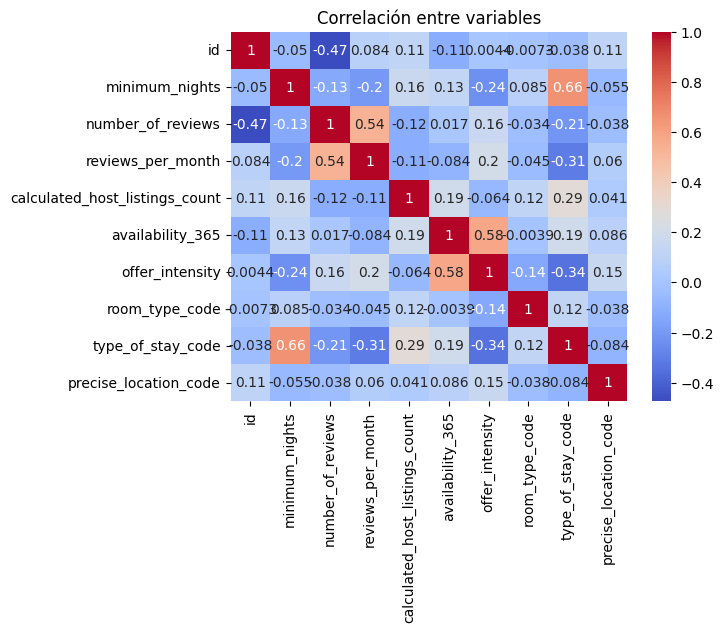

In [ ]:
#1-Verificamos si sobra alguna columna
for col in ['room_type', 'type_of_stay', 'precise_location']: 
    X[col + "_code"], _ = pd.factorize(X[col]) #Creamos columnas codificadas(solo para explorar correlaciones)

#2-Eliminamos las categoricas originales (porque no son numéricas)
X = X.drop(['room_type', 'type_of_stay', 'precise_location','price_range'], axis=1) 

#3-Graficamos  para ver las columnas creadas
sns.heatmap(X.corr(), cmap="coolwarm", annot=True) 
plt.title("Correlación entre variables")
plt.show()

#4-Eliminamos columnas innecesarias
X = X.drop(['id'], axis=1)


# Conclusiones


# 8-CEEP(Codificacion,Escalado,Entrenamiento y Prueba)

### 8.1-Dividir en entrenamiento y prueba

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

### 8.2-Separar columnas categóricas y numéricas

In [ ]:
categorical_cols = X_train.select_dtypes(include="object").columns
numerical_cols = X_train.select_dtypes(exclude="object").columns

X_train_cat = X_train[categorical_cols]
X_test_cat = X_test[categorical_cols]

X_train_num = X_train[numerical_cols]
X_test_num = X_test[numerical_cols]


### 8.3-Codificar categóricas (OneHotEncoder o LabelEncoding)

In [ ]:
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
X_train_encoded = encoder.fit_transform(X_train_cat)
X_test_encoded = encoder.transform(X_test_cat)

### 8.4-Escalar numéricas con StandardScaler

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)

### 8.5-Unir todo para entrenar el modelo

In [ ]:
X_train_final = np.concatenate([X_train_scaled, X_train_encoded], axis=1)
X_test_final = np.concatenate([X_test_scaled, X_test_encoded], axis=1)

# 9-Guardar con Pickle(Todavia faltan pasos como entrenar el modelo)

In [ ]:
# Guardamos los datos transformados
with open("X_train_final.pkl", "wb") as f:
    pickle.dump(X_train_final, f)

with open("X_test_final.pkl", "wb") as f:
    pickle.dump(X_test_final, f)

with open("y_train.pkl", "wb") as f:
    pickle.dump(y_train, f)

with open("y_test.pkl", "wb") as f:
    pickle.dump(y_test, f)
